In [1]:
import pandas as pd
import numpy as np
#import yfinance as yf
import datetime
import matplotlib.pyplot as plt
from nsepy import get_history

In [3]:
from matplotlib.ticker import StrMethodFormatter

In [4]:
data = get_history(symbol="NIFTY", start=datetime.date(2000,1,1), end=datetime.date(2022,10,10), index=True)

In [5]:
data.reset_index(inplace=True)
data["Date"]=pd.to_datetime(data["Date"])

In [6]:
epsdata = pd.read_excel("Nifty EPS.xlsx")

In [7]:
def endFY(cell):
    #print(cell)
    year = "20"+str(cell[-2:])
    d = datetime.date(int(year), 3, 31)
    return(d)

def get_EPS(date):
    month = date.month
    yr = date.year
    d = datetime.datetime(yr, month, date.day)
    if month > 3:
        currFY = "FY"+str(yr+1)[-2:]
        prevFY = "FY"+str(yr)[-2:]
        currendFYdate = datetime.datetime(yr+1, 3, 31)
        prevendFYdate = datetime.datetime(yr, 3, 31)
    else:
        currFY = "FY"+str(yr)[-2:]
        prevFY = "FY"+str(yr-1)[-2:]
        currendFYdate = datetime.datetime(yr, 3, 31)
        prevendFYdate = datetime.datetime(yr-1, 3, 31)

    #print(currendFYdate, prevendFYdate)
    pEPS = epsdata[epsdata["Year"]==prevFY].iloc[0,1]
    cEPS = epsdata[epsdata["Year"]==currFY].iloc[0,1]
    #print(pEPS, cEPS)
    
    frombegin = d - prevendFYdate
    noofdays = currendFYdate - prevendFYdate
    #print(type(frombegin), type(noofdays))
    epsdelta = cEPS-pEPS
    #print(epsdelta)
    currEPS = pEPS + epsdelta*frombegin/noofdays
    
    return(currEPS)

In [8]:
data["Year"] = [str(x.year) for x in data["Date"].tolist()]


In [9]:
data["EndFY"] = data["Year"].apply(lambda x: endFY(x))
data["EPS"] = data["Date"].apply(get_EPS)

In [10]:
data

,Date,Open,High,Low,Close,Volume,Turnover,Year,EndFY,EPS
0,2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,2000,2000-03-31,74.080557
1,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,2000,2000-03-31,74.093374
2,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,2000,2000-03-31,74.106191
3,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,2000,2000-03-31,74.119008
4,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,2000,2000-03-31,74.131826
...,...,...,...,...,...,...,...,...,...,...
5659,2022-09-30,16798.05,17187.10,16747.70,17094.35,380204763,2.620563e+11,2022,2022-03-31,812.202740
5660,2022-10-03,17102.10,17114.65,16855.55,16887.35,285850587,2.186054e+11,2022,2022-03-31,813.419178
5661,2022-10-04,17147.45,17287.30,17117.30,17274.30,231601639,1.848043e+11,2022,2022-03-31,813.824658
5662,2022-10-06,17379.25,17428.80,17315.65,17331.80,268239320,2.040446e+11,2022,2022-03-31,814.635616


In [11]:
data["PE"] = data["Close"]/data["EPS"]

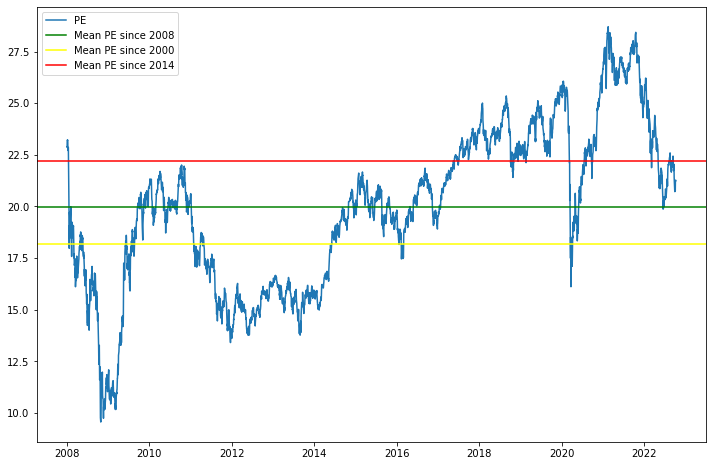

In [37]:
refdate = "2008-01-01"
data1 = data[data["Date"]>refdate]
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(data1["Date"], data1["PE"], label="PE")
ax.axhline(data1["PE"].mean(), color="green", label="Mean PE since 2008")
ax.axhline(data["PE"].mean(), color="yellow", label="Mean PE since 2000")
ax.axhline(data[data["Date"]>"2014-01-01"]["PE"].mean(), color="red", label="Mean PE since 2014")
ax.legend()
#ax2 = ax.twinx()
#ax2.plot(data["Date"], data["PE"].rolling(200).mean(), color="red")
plt.show()

In [95]:
data["roll"] = data["PE"].rolling(200).mean()
data

,Date,Open,High,Low,Close,Volume,Turnover,Year,EndFY,EPS,PE,1 yr return,5 yr return,3 yr return,7 yr return,roll
0,2000-01-03,1482.15,1592.90,1482.15,1592.20,25358322,8.841500e+09,2000,2000-03-31,74.080557,21.492819,-0.212222,0.284481,-0.313497,1.406733,NaN
1,2000-01-04,1594.40,1641.95,1594.40,1638.70,38787872,1.973690e+10,2000,2000-03-31,74.093374,22.116687,-0.223897,0.258742,-0.335083,1.328401,NaN
2,2000-01-05,1634.55,1635.50,1555.05,1595.80,62153431,3.084790e+10,2000,2000-03-31,74.106191,21.533963,-0.190845,0.292518,-0.320498,1.402243,NaN
3,2000-01-06,1595.80,1639.00,1595.80,1617.60,51272875,2.531180e+10,2000,2000-03-31,74.119008,21.824361,-0.191611,0.280508,-0.331231,1.393144,NaN
4,2000-01-07,1616.60,1628.25,1597.20,1613.30,54315945,1.914630e+10,2000,2000-03-31,74.131826,21.762583,-0.177307,0.282836,-0.324769,1.442509,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5519,2022-03-09,16078.00,16418.05,15990.00,16345.35,462231428,3.532934e+11,2022,2022-03-31,726.186301,22.508480,NaN,NaN,NaN,NaN,26.223043
5520,2022-03-10,16757.10,16757.30,16447.90,16594.90,486445481,3.551373e+11,2022,2022-03-31,726.723288,22.835239,NaN,NaN,NaN,NaN,26.204139
5521,2022-03-11,16528.80,16694.40,16470.90,16630.45,343717045,2.472034e+11,2022,2022-03-31,727.260274,22.867260,NaN,NaN,NaN,NaN,26.185426
5522,2022-03-14,16633.70,16887.95,16606.50,16871.30,314669685,2.382402e+11,2022,2022-03-31,728.871233,23.147161,NaN,NaN,NaN,NaN,26.167424


In [66]:
data["1 yr return"] = data["Close"].shift(-250)/data["Close"]-1
data["5 yr return"] = data["Close"].shift(-250*5)/data["Close"]-1
data["3 yr return"] = data["Close"].shift(-250*3)/data["Close"]-1
data["7 yr return"] = data["Close"].shift(-250*7)/data["Close"]-1

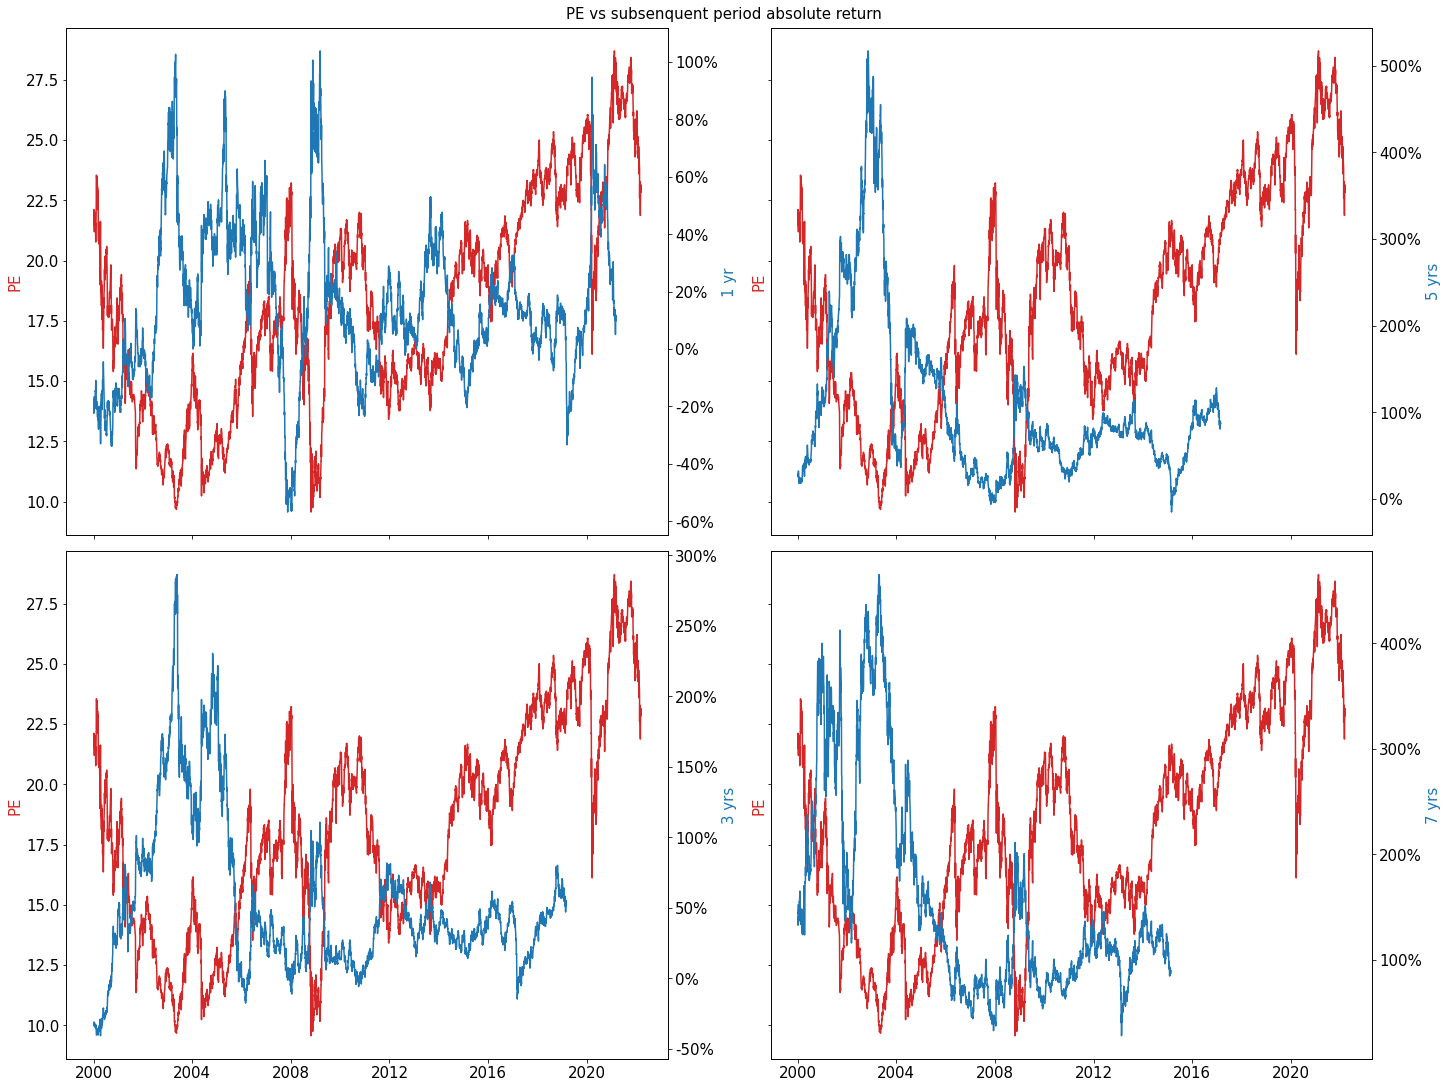

In [67]:
fig, axs = plt.subplots(2, 2, figsize=(20,15), sharex=True, sharey=True, constrained_layout=True)
# plt.rc('axes', labelsize=15)
# plt.rc('xtick', labelsize=15)   
# plt.rc('ytick', labelsize=15)


cols = ["1 yr return", "3 yr return", "5 yr return", "7 yr return"]
labels = ["1 yr", "3 yrs", "5 yrs", "7 yrs"]
fig.suptitle("PE vs subsenquent period absolute return", fontsize=15)
for i in range(4):
    k = i % 2
    j = int(i/2)
    #print(k,j)
    col=cols[i]
    label=labels[i]
    plt.rc('xtick',labelsize=15)
    plt.rc('ytick',labelsize=15)
    color = "tab:red"
    axs[k,j].set_ylabel("PE", color=color, fontsize=15)
    axs[k,j].plot(data["Date"], data["PE"], color=color)
    
    ax2 = axs[k,j].twinx()
    color = "tab:blue"
    ax2.set_ylabel(label, color=color, fontsize=15)
    ax2.plot(data["Date"], data[col], color=color)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0%}')) # No decimal places

plt.show()

In [79]:
PE = 22.8
low = 0.99*PE
high = 1.01*PE
k = data[(data["PE"]>low) & (data["PE"]<high)]

In [101]:
k["5 yr return"].median()

-0.01335809467956861